<h1>Prediksi Penumpang Pesawat International</h1>
<p>LSTM dan ANN digunakan untuk memprediksi deret waktu. Secara umum, algoritma pembelajaran mesin menggunakan metode prediksi satu langkah dalam prediksi deret waktu. Kode ini meluas ke kasus prediksi multi-langkah. Perbaikan utama terletak pada konstruksi data.</p>
<p>ANN adalah bagian dari sistem komputasi yang dirancang untuk mensimulasikan cara otak manusia menganalisis dan memproses informasi. Ini adalah dasar dari kecerdasan buatan (AI) dan memecahkan masalah yang terbukti tidak mungkin atau sulit menurut standar manusia atau statistik. JST memiliki kemampuan belajar mandiri yang memungkinkannya menghasilkan hasil yang lebih baik saat lebih banyak data tersedia.</p>


In [ ]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')#gambar
np.random.seed(100)
window=12#Waktu
label_dim=3#beri label
scale=100#Parameter_normalisasi
amount_of_features=1#fitur
d=0.05#dropout koefisien
batch_size=64#jumlah_batch
epoch=20#jumlah iterasi
train_file='international-airline-passengers.csv'#baca_file 
test_file='example.csv'
save_file='predict_result_ann.csv'

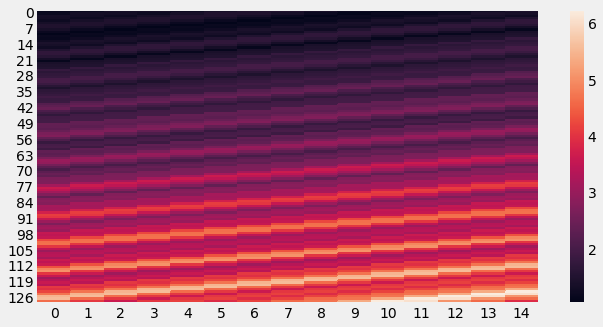

In [2]:
data=pd.read_csv(train_file,header=0) 
data=data['passengers']#data_yang_dipilih
#kumpulan_data_untuk_dipelajari
data=data.values 
dataset=data
for i in range(window+label_dim-1):
    zero=np.zeros(i+1)
    temp=np.append(data[i+1:],zero)
    dataset=np.row_stack((dataset,temp))
dataset=pd.DataFrame(dataset).T
dataset=dataset.iloc[:-(window+label_dim)]
dataset=dataset/scale#lakukan_pseudo_normalisasi
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dataset,annot=False)
plt.show()#data_asli

In [7]:
#membagi_fitur_dengan_label
X=dataset.iloc[:,:window]
y=dataset.iloc[:,-label_dim:]

In [ ]:
#buat_set_pelatihan_dan_pengujian
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix 
X,y=random_forest.fit(X_train,y_train.ravel())
print(X.shape)#Nilai_format_data_yang_benar_dengan_mengeluarkan_ukuran_set_pelatihan_dan_set_pengujian.
print(y.shape)

In [16]:
#pelatihan_menggunakan_modelJST
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Dropout
#from keras.layers.recurrent import LSTM
#membagung_proses_pelatihan
model = Sequential()#membangun_model_hirarki
model.add(Dense(label_dim*4,input_dim=window,activation='relu'))#membangun_lapisan_LSTM
#model.add(Dropout(d))
#model.add(Dense(label_dim*2,activation='relu'))   #buat_lapisan_terhubung 
#model.add(Dropout(d))
model.add(Dense(label_dim))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 39        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Pelatihan_dan_hasil_ANN
history = model.fit(X, y, epochs =20, batch_size = 10,verbose=1,validation_split=0.1)

Train on 116 samples, validate on 13 samples
Epoch 1/20
116/116 [==============================] - 1s 5ms/step - loss: 30.0483 - acc: 0.2241 - val_loss: 65.8332 - val_acc: 0.1538
Epoch 2/20
116/116 [==============================] - 0s 241us/step - loss: 21.2946 - acc: 0.2241 - val_loss: 46.4821 - val_acc: 0.1538
Epoch 3/20
116/116 [==============================] - 0s 250us/step - loss: 15.0189 - acc: 0.2241 - val_loss: 32.8104 - val_acc: 0.1538
Epoch 4/20
116/116 [==============================] - 0s 276us/step - loss: 10.7573 - acc: 0.2241 - val_loss: 23.6214 - val_acc: 0.1538
Epoch 5/20
116/116 [==============================] - 0s 267us/step - loss: 7.7071 - acc: 0.2241 - val_loss: 17.6526 - val_acc: 0.1538
Epoch 6/20
116/116 [==============================] - 0s 302us/step - loss: 5.8428 - acc: 0.2241 - val_loss: 13.2741 - val_acc: 0.1538
Epoch 7/20
116/116 [==============================] - 0s 293us/step - loss: 4.3798 - acc: 0.2241 - val_loss: 10.2082 - val_acc: 0.1538
Epoch 8/

In [12]:
#pengujian_filter
test=pd.read_csv(test_file,header=0) 
test=test['passengers']/scale#data_yang_dipilih
test=np.reshape(test.values, (1, window))
print(test.shape)

(1, 12)


In [13]:
#perkiraan_sebenarnya
predict=model.predict(test)[0,:]*scale
#menyimpan_file
(pd.DataFrame(predict)).to_csv(save_file)
print(predict)

[418.51443 387.20108 454.52347]


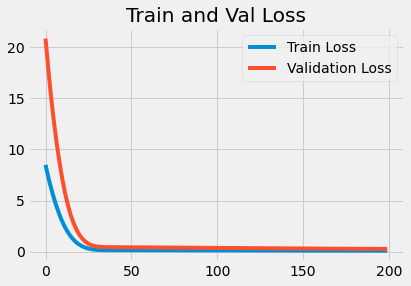

In [78]:
#gambar_berulang
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epoch)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()

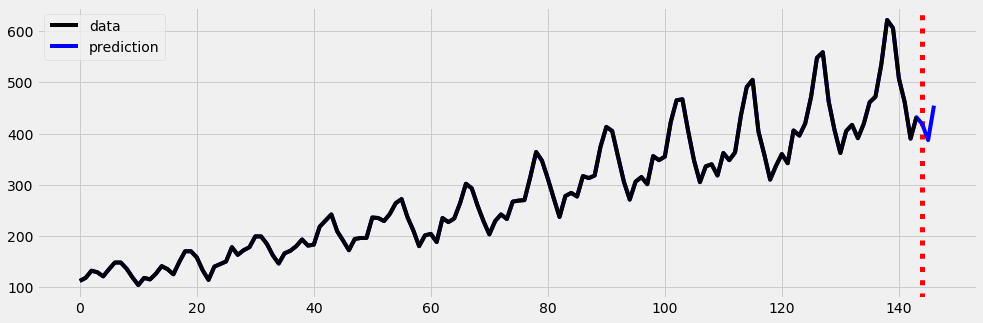

In [14]:

data_times=np.arange(len(data))
all_data=np.hstack((data,predict)) 
predicted_times=np.arange(len(all_data))
plt.figure(figsize=(15, 5))
plt.axvline(len(data), linestyle="dotted", linewidth=5, color='r')
predicted_lines = plt.plot(predicted_times, all_data, label="prediction", color="b")
data_lines = plt.plot(data_times, data, label="data", color="k")
plt.legend(handles=[data_lines[0], predicted_lines[0]],loc="upper left")
plt.show()

<p>https://github.com/stxupengyu/LSTM-ANN-Time-Series-Prediction</p>